In [372]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read the original data

In [373]:
import pandas as pd
import numpy as np
from sklearn import tree
df = pd.read_csv('drive/MyDrive/student-mat.csv', sep=';')

##Deal with possible empty data points

In [374]:
display(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Output true if and only if there is no empty data cells

In [375]:
df_dummy = df.dropna()
df_dummy.shape[0] == df.shape[0]

True

## Breif overview of the dataframe

In [376]:
df.head(n=2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6


Summary of the data

In [377]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [378]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Preprocessing According The Overview

### Let's explore the correlationship between dependent and independet variables

In [379]:
cor = pd.DataFrame(df.corr().G3.reset_index())
cor[abs(cor.G3)>0.05]
#display correlationship between variables and G3, filter 
#those with absolute correlation > 0.05

,index,G3
0,age,-0.161579
1,Medu,0.217147
2,Fedu,0.152457
3,traveltime,-0.117142
4,studytime,0.097820
5,failures,-0.360415
6,famrel,0.051363
8,goout,-0.132791
9,Dalc,-0.054660
10,Walc,-0.051939


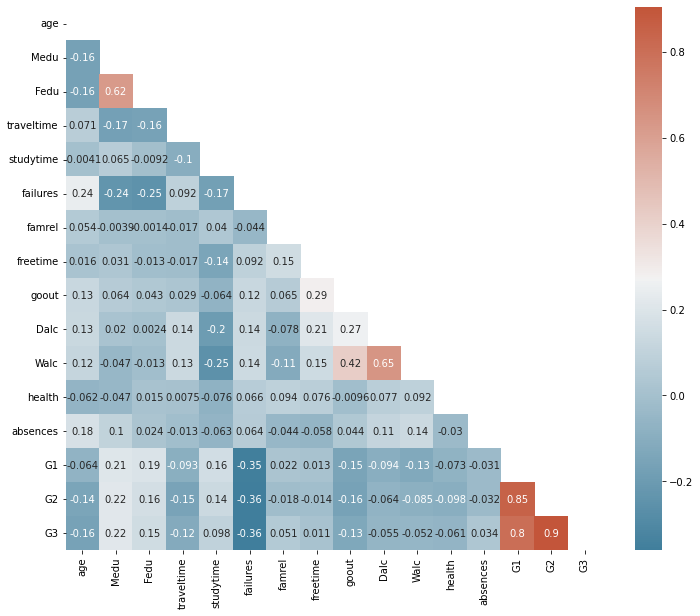

In [360]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
#Visualization of correlationship

In [361]:
cor = cor.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
cor.sort_values(by=['G3'],ascending=False)
#Sort the correlationship according to the absolute value

,index,G3
15,G3,1.000000
14,G2,0.904868
13,G1,0.801468
5,failures,0.360415
1,Medu,0.217147
0,age,0.161579
2,Fedu,0.152457
8,goout,0.132791
3,traveltime,0.117142
4,studytime,0.097820


### Let's dive deeper into the correlationship

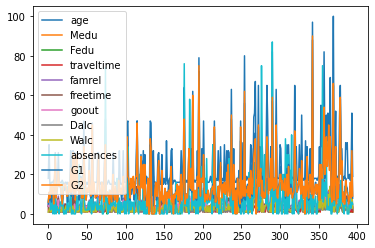

In [362]:
tdf = df.groupby(['studytime', 'failures', 'activities', 'health','G3']).cumsum()
tdf.plot()

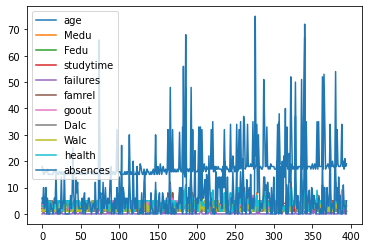

In [363]:
tdf = df.groupby(['traveltime', 'G1', 'G2', 'freetime','G3']).cumsum()
tdf.plot()

In [364]:
include = ['address','traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities',
           'higher', 'internet', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 
           'G1', 'G2', 'G3']
df.drop(columns=df.columns.difference(include), inplace=True)  

In [365]:
df['qual_student'] = np.where(df['G3']>=15, 1, 0)

,address,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,qual_student
0,U,2,2,0,yes,no,no,no,yes,no,3,4,1,1,3,6,5,6,6,0
1,U,1,2,0,no,yes,no,no,yes,yes,3,3,1,1,3,4,5,5,6,0
2,U,1,2,3,yes,no,yes,no,yes,yes,3,2,2,3,3,10,7,8,10,0
3,U,1,3,0,no,yes,yes,yes,yes,yes,2,2,1,1,5,2,15,14,15,1
4,U,1,2,0,no,yes,yes,no,yes,no,3,2,1,2,5,4,6,10,10,0


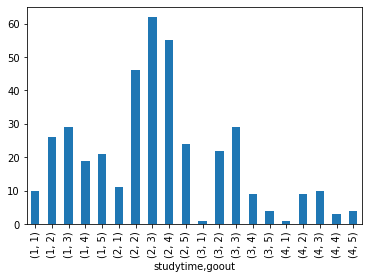

In [366]:
df.groupby(['studytime', 'goout']).count().qual_student.plot(kind = 'bar')
df.head()

,address,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,qual_student
0,U,2,2,0,yes,no,no,no,yes,no,3,4,1,1,3,6,5,6,6,0
1,U,1,2,0,no,yes,no,no,yes,yes,3,3,1,1,3,4,5,5,6,0
2,U,1,2,3,yes,no,yes,no,yes,yes,3,2,2,3,3,10,7,8,10,0
3,U,1,3,0,no,yes,yes,yes,yes,yes,2,2,1,1,5,2,15,14,15,1
4,U,1,2,0,no,yes,yes,no,yes,no,3,2,1,2,5,4,6,10,10,0


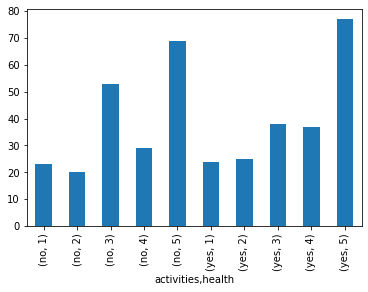

In [367]:
df.groupby(['activities', 'health']).count().qual_student.plot(kind = 'bar')
df.head()

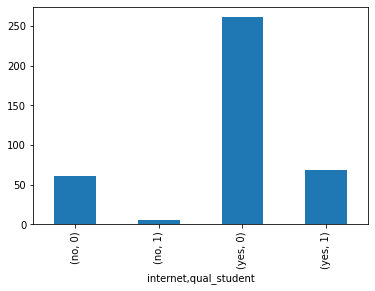

In [368]:
import matplotlib
df.groupby(['internet','qual_student']).count().address.plot(kind='bar')

The goal is to predict the quality of the student. We will build a predictor based on the final grade (G3).
Becasue we are trying to find quality students. In this model we define a quality student as one who achieves a final grade of 15 or higher. 

Drop the G3 score

## Use Decision Tree to Generate the Model

In [369]:
include = ['address','traveltime','studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
           'higher', 'internet', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 
           'G1', 'G2', 'qual_student']
df.drop(columns=df.columns.difference(include), inplace=True) 


In [370]:
#df.replace('yes',1,inplace = True)    
#df.replace('no',0,inplace = True)

Import scikit-learn and build a random forest classifer

In [371]:
from sklearn import preprocessing
dependent_variable = 'qual_student'
X = df[['studytime','goout', 'Dalc', 'absences', 'G1', 'G2']]
X = pd.get_dummies(X)
Y = df[dependent_variable]

In [380]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import sklearn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.27)
rfc = tree.DecisionTreeClassifier(max_depth = 5)
rfc.fit(X_train, Y_train)
pred = rfc.score(X_test, Y_test)
y_pred = rfc.predict(X_test)
print('****Results****')
print("Accuracy: {:.4%}".format(pred))
rfc.fit(X_train.values, Y_train.values)

****Results****
Accuracy: 95.3271%


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [381]:
acc_train = rfc.score(X_train, Y_train)
print("Training accuracy:", acc_train)
acc_test = rfc.score(X_test, Y_test)
print("Test accuracy:", acc_test)

Training accuracy: 0.9965277777777778
Test accuracy: 0.9532710280373832


In [382]:
precision = precision_score(Y_test.values, y_pred, average = 'binary')
recall = recall_score(Y_test.values, y_pred, average = 'binary')
f1_score = 2 * (precision * recall) / (precision + recall)
scores = cross_val_score(rfc, X.values, Y.values, cv=10, scoring='roc_auc')
scoresP = cross_val_score(rfc, X.values, Y.values, cv=10, scoring='f1_macro')
print("Precision is ", precision)
print("Recall is ", recall)
print("F1_score is ", f1_score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresP.mean(), scoresP.std()))

Precision is  0.9090909090909091
Recall is  0.8695652173913043
F1_score is  0.888888888888889
0.93 accuracy with a standard deviation of 0.06
0.93 accuracy with a standard deviation of 0.06


In [383]:
import joblib
# modify the file path to where you want to save the model
joblib.dump(rfc, 'drive/MyDrive/model.pkl')

['drive/MyDrive/model.pkl']